In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/Users/carterhogan/CaseStudies/world_value_survey/analysis/data/wvs/wave7.csv')

/var/folders/k9/j4977wt918z9ns7wk6kqfmqm0000gn/T/ipykernel_3559/1931134147.py:7: DtypeWarning: Columns (582,583,584) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/carterhogan/CaseStudies/world_value_survey/analysis/data/wvs/wave7.csv')


In [2]:
migration_questions = [f"Q{i}" for i in range(121,130)]
migration_perception = ["Q121"]
migration_positive = ["Q122","Q123","Q125","Q127"]
migration_negative =["Q124","Q126","Q128","Q129"]

na_values = any(df.loc[:, migration_questions].isna().sum()/len(df) != 0)
print("There are missing values in the corruption data" if na_values else "There are no NA values")


There are no NA values


Text(0.5, 1.0, 'Missing values (in %) after question')

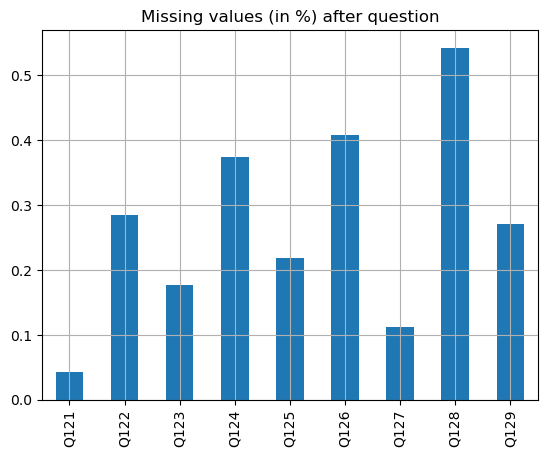

In [5]:
((df.loc[:, migration_questions] <= 0).sum(axis=0)/ len(df)).plot(kind = "bar")
plt.grid(True)
plt.title("Missing values (in %) after question")

(array([ 596.,    0., 1774.,    0.,    0., 4381.,    0., 3484.,    0.,
        1277.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

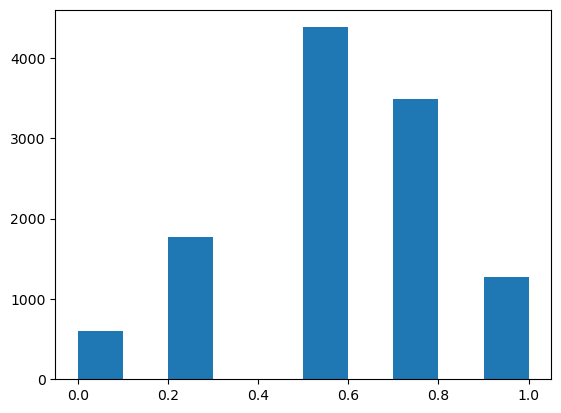

In [3]:
plt.hist(df['Q121'])

In [6]:
# create a median dict with all the relevant values
median_dict = {}
countries = df.B_COUNTRY.unique()

for ct in countries:
    median_dict[ct] = {}

for tq in migration_questions:
    for ct in countries:
        median_dict[ct][tq] = df.loc[(df[tq] > 0) & (df.B_COUNTRY == ct), tq].median()

In [7]:
# now populate the dataframe with the median values
for tq in migration_questions:
    df[tq] = df.loc[:, [tq, "B_COUNTRY"]].apply(lambda row: median_dict[row["B_COUNTRY"]][tq] if row[tq] <= 0 else row[tq], axis=1)

Text(0.5, 1.0, 'Missing values (in %) after question')

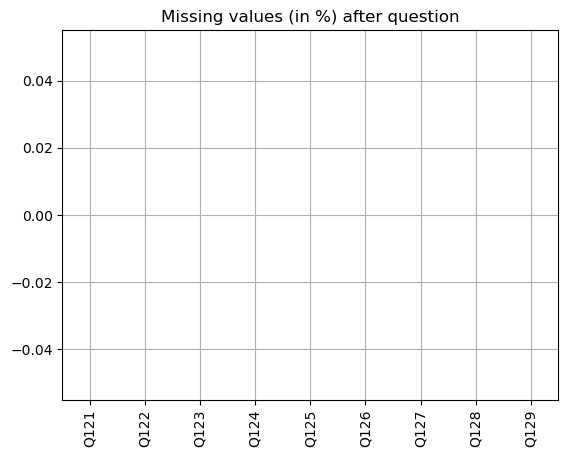

In [8]:
((df.loc[:, migration_questions] <= 0).sum(axis=0)/ len(df)).plot(kind = "bar")
plt.grid(True)
plt.title("Missing values (in %) after question")

In [11]:
scaler = MinMaxScaler()
scaler.fit(df.loc[:, migration_perception])
df.loc[:, migration_perception] = scaler.transform(df.loc[:, migration_perception])

scaler.fit(df.loc[:, migration_positive])
df.loc[:, migration_positive] = scaler.transform(df.loc[:, migration_positive])


scaler.fit(df.loc[:, migration_negative])
df.loc[:, migration_negative] = scaler.transform(df.loc[:, migration_negative])



In [12]:
df["migration_perception"] = df.loc[:, migration_perception]
df["migration_positive"] = df.loc[:, migration_positive].mean(axis=1)
df["migration_negative"] = df.loc[:, migration_negative].mean(axis=1)

(array([ 596.,    0., 1774.,    0.,    0., 4381.,    0., 3484.,    0.,
        1277.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

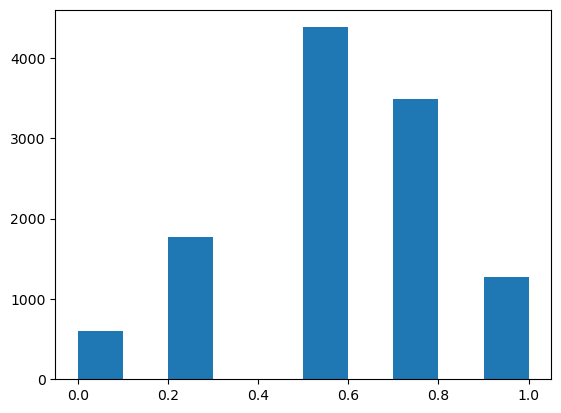

In [4]:
plt.hist(df['migration_perception'])

In [ ]:
def attach_migration_index(df: pd.DataFrame) -> pd.DataFrame:
  """
  # Creating a migration perception

  Attaches migration perception variables to the dataframe.
  Furthermore, all migration related questions are preprocessed by imputing with the median and MinMaxScaled.

  Parameters:
    df(pd.DataFrame): the wave7.csv dataframe stored by the data_filter_merge.ipynb
  
  Returns:
    pd.DataFrame: Processed dataframe with the migration perception variables ['migration_perception'],['migration_positive'],['migration_negative']]
  """

  migration_questions = [f"Q{i}" for i in range(121,130)]
  migration_perception = ["Q121"]
  migration_positive = ["Q122","Q123","Q125","Q127"]
  migration_negative =["Q124","Q126","Q128","Q129"]

  result = df.copy()

  # 1. imputing with median --------------------------------------------
  # create a median dict with all the relevant values
  median_dict = {}
  countries = result.B_COUNTRY.unique()

  for ct in countries:
      median_dict[ct] = {}

  for tq in migration_questions:
      for ct in countries:
          median_dict[ct][tq] = result.loc[(result[tq] > 0) & (result.B_COUNTRY == ct), tq].median()
  
  # now populate the dataframe with the median values
  for tq in migration_questions:
      result[tq] = result.loc[:, [tq, "B_COUNTRY"]].apply(lambda row: median_dict[row["B_COUNTRY"]][tq] if row[tq] <= 0 else row[tq], axis=1)
    
  # 2. Minmax scaling --------------------------------------------
  scaler = MinMaxScaler()
  scaler.fit(result.loc[:, migration_perception])
  result.loc[:, migration_perception] = scaler.transform(result.loc[:, migration_perception])

  scaler.fit(result.loc[:, migration_positive])
  result.loc[:, migration_positive] = scaler.transform(result.loc[:, migration_positive])


  scaler.fit(result.loc[:, migration_negative])
  result.loc[:, migration_negative] = scaler.transform(result.loc[:, migration_negative])

  # 3. Creating migration perception variables --------------------------------------------
  result["migration_perception"] = result.loc[:, migration_perception]
  result["migration_positive"] = result.loc[:, migration_positive].mean(axis=1)
  result["migration_negative"] = result.loc[:, migration_negative].mean(axis=1)
  return result



In [ ]:
# This implementation is for political preference
def attach_pol_pref(df: pd.DataFrame) -> pd.DataFrame:
  """
  # Creating a pol pref index

  Attaches the political preference of interviewees
  Parameters:
    df(pd.DataFrame): the wave7.csv dataframe stored by the data_filter_merge.ipynb
  
  Returns:
    pd.DataFrame: Processed dataframe with the the political preference 'pol_pref'
  """

  pol_pref = ["Q240"]

  result = df.copy()

  # 1. imputing with median --------------------------------------------
  # create a median dict with all the relevant values
  median_dict = {}
  countries = result.B_COUNTRY.unique()

  for ct in countries:
      median_dict[ct] = {}

  for tq in pol_pref:
      for ct in countries:
          median_dict[ct][tq] = result.loc[(result[tq] > 0) & (result.B_COUNTRY == ct), tq].median()
  
  # now populate the dataframe with the median values
  for tq in pol_pref:
      result[tq] = result.loc[:, [tq, "B_COUNTRY"]].apply(lambda row: median_dict[row["B_COUNTRY"]][tq] if row[tq] <= 0 else row[tq], axis=1)
    
  # 2. Minmax scaling --------------------------------------------
  scaler = MinMaxScaler()
  scaler.fit(result.loc[:, pol_pref])
  result.loc[:, pol_pref] = scaler.transform(result.loc[:, pol_pref])

  # 3. Creating political preference variable --------------------------------------------
  result["pol_pref"] = result.loc[:, pol_pref]
  return result
